In [25]:
from google.colab import drive
drive.mount('/content/drive')
path=('/content/drive/MyDrive/csv files/NVIDIA_STOCK.csv')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv(path)
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Price,Adj Close,Close,High,Low,Open,Volume
0,Ticker,NVDA,NVDA,NVDA,NVDA,NVDA,NVDA
1,Date,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-01-02,4.929879665374756,4.983749866485596,4.987500190734863,4.862500190734863,4.894499778747559,355616000
3,2018-01-03,5.254334926605225,5.3117499351501465,5.34250020980835,5.09375,5.102499961853027,914704000
4,2018-01-04,5.2820329666137695,5.339749813079834,5.451250076293945,5.317249774932861,5.394000053405762,583268000


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1699 entries, 0 to 1698
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1699 non-null   object
 1   Adj Close  1698 non-null   object
 2   Close      1698 non-null   object
 3   High       1698 non-null   object
 4   Low        1698 non-null   object
 5   Open       1698 non-null   object
 6   Volume     1698 non-null   object
dtypes: object(7)
memory usage: 93.0+ KB


In [27]:
df.drop(index=[1],inplace=True)
df.drop(columns=['Price'],inplace=True)


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1698 entries, 0 to 1698
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Adj Close  1698 non-null   object
 1   Close      1698 non-null   object
 2   High       1698 non-null   object
 3   Low        1698 non-null   object
 4   Open       1698 non-null   object
 5   Volume     1698 non-null   object
dtypes: object(6)
memory usage: 92.9+ KB


In [29]:
df.value_counts()

,,,,,,count
Adj Close,Close,High,Low,Open,Volume,
10.020840644836426,10.052249908447266,10.79224967956543,10.024999618530273,10.595000267028809,457076000,1
45.4901008605957,45.50299835205078,47.387001037597656,45.4119987487793,47.21500015258789,380590000,1
45.4483757019043,45.46900177001953,48.0880012512207,45.060001373291016,46.58300018310547,772075000,1
45.444114685058594,45.46099853515625,47.11600112915039,45.279998779296875,46.959999084472656,474115000,1
45.431373596191406,45.45199966430664,46.053001403808594,44.630001068115234,46.020999908447266,364237000,1
...,...,...,...,...,...,...
20.350196838378906,20.364999771118164,20.628000259399414,19.405000686645508,19.461999893188477,542142000,1
20.331850051879883,20.371749877929688,20.875,20.332000732421875,20.853500366210938,418428000,1
20.32611083984375,20.365999221801758,20.56999969482422,20.209999084472656,20.52400016784668,178497000,1


In [30]:
i = 0
while i < len(df):
  if 'NVDA' in df.iloc[i].values:
    df = df.drop(index=df.index[i])
    df = df.reset_index(drop=True)
  else:
    i += 1

In [31]:
df['Adj Close']=df['Adj Close'].astype(float)
df['Close']=df['Close'].astype(float)
df['High']=df['High'].astype(float)
df['Low']=df['Low'].astype(float)
df['Open']=df['Open'].astype(float)
df['Volume']=df['Volume'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1697 entries, 0 to 1696
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Adj Close  1697 non-null   float64
 1   Close      1697 non-null   float64
 2   High       1697 non-null   float64
 3   Low        1697 non-null   float64
 4   Open       1697 non-null   float64
 5   Volume     1697 non-null   float64
dtypes: float64(6)
memory usage: 79.7 KB


In [33]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df_scaled=sc.fit_transform(df)
df_scaled=pd.DataFrame(df_scaled,columns=df.columns)
df_scaled.head()

,Adj Close,Close,High,Low,Open,Volume
0,-0.680102,-0.679439,-0.681400,-0.681068,-0.681750,-0.554661
1,-0.668996,-0.668209,-0.669489,-0.672972,-0.674635,2.117030
2,-0.668048,-0.667251,-0.665840,-0.665147,-0.664663,0.533210
3,-0.666515,-0.665701,-0.666796,-0.666556,-0.666005,0.518186
4,-0.660928,-0.660052,-0.660010,-0.659991,-0.660694,1.957002


In [36]:
from tensorflow import keras
from keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [38]:
from sklearn.model_selection import train_test_split
x=df_scaled.drop(columns='Close',axis=1)
y=df_scaled['Close']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [42]:
model=Sequential()
model.add(Dense(25,activation='relu',input_dim=5))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='linear'))
model.compile(loss='mean_squared_error',optimizer='adam',metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [50]:
history=model.fit(x_train,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.0000e+00 - loss: 7.5286e-04 - val_accuracy: 0.0000e+00 - val_loss: 8.5471e-04
Epoch 2/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 6.6229e-04 - val_accuracy: 0.0000e+00 - val_loss: 7.2976e-04
Epoch 3/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 5.1514e-04 - val_accuracy: 0.0000e+00 - val_loss: 6.1595e-04
Epoch 4/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 4.7893e-04 - val_accuracy: 0.0000e+00 - val_loss: 5.4892e-04
Epoch 5/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 3.8841e-04 - val_accuracy: 0.0000e+00 - val_loss: 4.9886e-04
Epoch 6/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 3.6053e-04 - val_accuracy: 0.0000e+00 - val_loss: 4.3751e-04
Epoch 7/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 3.6848e-04 - val_accuracy: 0.0000e+00 - val_loss: 4.0469e-04
Epoch

In [48]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
y_pred=model.predict(x_test)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


In [49]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
print(mse)
print(mae)

0.0008482185296506369
0.021637413554189532


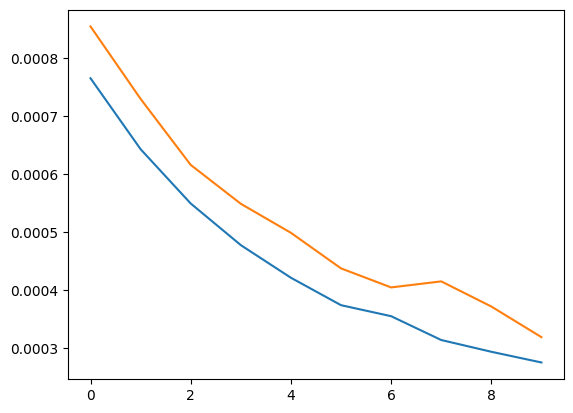

In [51]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

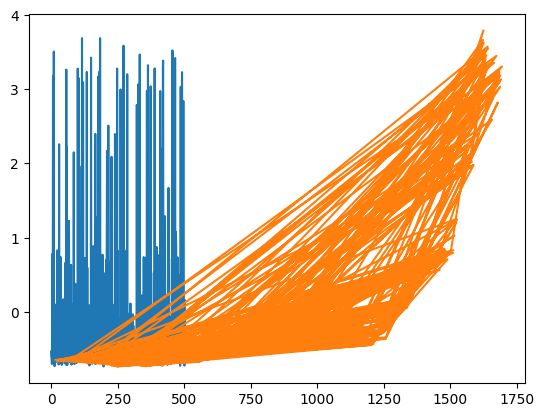

In [57]:
plt.plot(y_pred)
plt.plot(y_test)

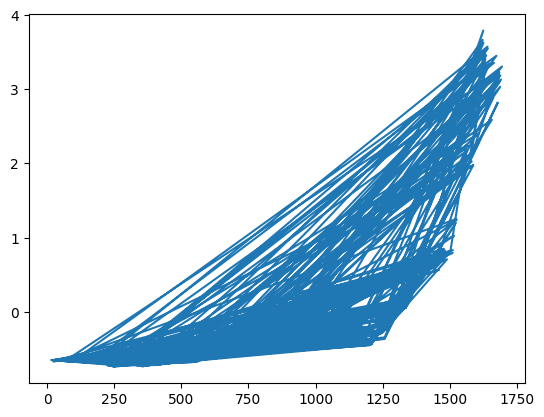